In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading our Dataset**


In [2]:
#Reading the dataset for our customer churn
customer_churn = pd.read_csv('CustomerChurn_dataset.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking if our dataset has missing values
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Feature Engineering**

In [5]:
customer_churn.drop('customerID', inplace= True, axis= 1)

In [6]:
#Replacing spaces in the TotalCharges column with '0'
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", "0.00")

In [7]:
#Converting the TotalCharges column to float
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype("float")

In [8]:
#Seperating the object columns
cusChurn_obj_col = customer_churn.select_dtypes(include=['object'])

#Seperating the numeric columns
cusChurn_num_col = customer_churn.select_dtypes(include=['int', 'int64', 'float'])

In [9]:
cusChurn_obj_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [10]:
cusChurn_num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


**Scaling the numeric columns**

In [11]:
scaler = StandardScaler()

num_col_scaled = scaler.fit_transform(cusChurn_num_col)

# new DataFrame with the scaled features
cusChurn_num_col_scaled = pd.DataFrame(num_col_scaled, columns=cusChurn_num_col.columns)

In [12]:
cusChurn_num_col_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992611
1,-0.439916,0.066327,-0.259629,-0.172165
2,-0.439916,-1.236724,-0.362660,-0.958066
3,-0.439916,0.514251,-0.746535,-0.193672
4,-0.439916,-1.236724,0.197365,-0.938874


**OneHotEncoding the Object columns**

In [13]:
cusChurn_obj_col_enc = pd.get_dummies(cusChurn_obj_col, cusChurn_obj_col.columns, dtype= int)

cusChurn_obj_col_enc.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1


**Combining the refined data**

In [14]:
cus_ref_data = pd.concat([cusChurn_num_col_scaled, cusChurn_obj_col_enc] , axis= 1)

In [15]:
cus_ref_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   int32  
 5   gender_Male                              7043 non-null   int32  
 6   Partner_No                               7043 non-null   int32  
 7   Partner_Yes                              7043 non-null   int32  
 8   Dependents_No                            7043 non-null   int32  
 9   Dependents_Yes                           7043 non-null   int32  
 10  PhoneService_No                          7043 no

In [16]:
cus_ref_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,-0.439916,-1.277445,-1.160323,-0.992611,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.439916,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,-0.439916,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,-0.439916,0.514251,-0.746535,-0.193672,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,-0.439916,-1.236724,0.197365,-0.938874,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


**Feature Selection**

In [17]:
cus_ref_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,-3.783239e-17,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880,0.734630,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141,0.441561,0.441561
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-1.005780e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.299464e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.905282e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.648034e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.273159e+00,1.613701e+00,1.794352e+00,2.825806e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [19]:
# Splitting the data into features (X) and target variable (y)
columns_to_drop = ['Churn_Yes','Churn_No'] #We exclude 'Churn_No' because if we already know the value of churn_No, we don't need Churn_Yes
X = cus_ref_data.drop(columns_to_drop, axis=1)
y = cus_ref_data['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Getting important features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                                         importance
TotalCharges                               0.161670
tenure                                     0.140313
MonthlyCharges                             0.138301
Contract_Month-to-month                    0.050382
TechSupport_No                             0.034889
OnlineSecurity_No                          0.032780
PaymentMethod_Electronic check             0.026828
InternetService_Fiber optic                0.023889
SeniorCitizen                              0.019094
gender_Male                                0.018377
OnlineBackup_No                            0.017554
gender_Female                              0.017289
PaperlessBilling_Yes                       0.015977
Partner_No                                 0.015784
Contract_Two year                          0.015284
Partner_Yes                                0.015014
DeviceProtection_No                        0.014616
PaperlessBilling_No                        0.014279
MultipleLine

In [54]:
#Visualization
import matplotlib.pyplot as plt

<Figure size 1000x2000 with 0 Axes>

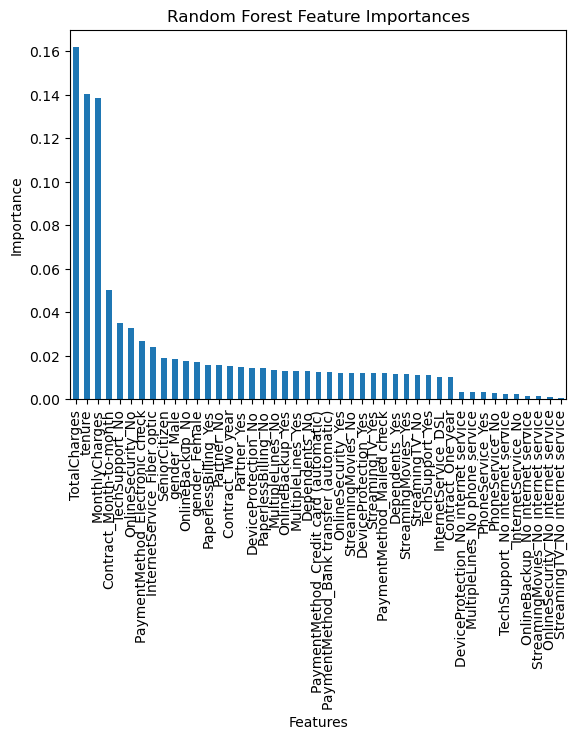

In [57]:
plt.figure(figsize=(10, 20))
feature_importances.plot(kind='bar', legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Feature Selection**

In [21]:
from sklearn.feature_selection import SelectFromModel

In [22]:
#Selecting important features using the model based on feature importance

sfm = SelectFromModel(rf, threshold=0.015)  # Adjust threshold as needed
sfm.fit(X_train, y_train)

selected_features = X_train.columns[sfm.get_support()]
print(selected_features)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_No', 'Contract_Month-to-month', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [23]:
#Performing cross validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

In [24]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # You can use different scoring metrics


print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

#Thresholds: 0.015

Cross-Validation Scores: [0.79630944 0.78779276 0.76295245 0.79616477 0.796875  ]
Mean Accuracy: 0.7880188842828568


In [25]:
selected_features.value_counts()

SeniorCitizen                     1
tenure                            1
MonthlyCharges                    1
TotalCharges                      1
gender_Female                     1
gender_Male                       1
Partner_No                        1
InternetService_Fiber optic       1
OnlineSecurity_No                 1
OnlineBackup_No                   1
TechSupport_No                    1
Contract_Month-to-month           1
Contract_Two year                 1
PaperlessBilling_No               1
PaperlessBilling_Yes              1
PaymentMethod_Electronic check    1
Name: count, dtype: int64

In [26]:
featureDrops = ['PaperlessBilling_No']
selected_features = selected_features.drop(featureDrops) #We only need these 'No's' since they have a corresponding 'Yes'

selected_features.value_counts()

SeniorCitizen                     1
tenure                            1
MonthlyCharges                    1
TotalCharges                      1
gender_Female                     1
gender_Male                       1
Partner_No                        1
InternetService_Fiber optic       1
OnlineSecurity_No                 1
OnlineBackup_No                   1
TechSupport_No                    1
Contract_Month-to-month           1
Contract_Two year                 1
PaperlessBilling_Yes              1
PaymentMethod_Electronic check    1
Name: count, dtype: int64

**New Dataframe using selected features**

In [104]:
cus_selected_features = cus_ref_data[selected_features]

In [105]:
cus_selected_features.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,-0.439916,-1.277445,-1.160323,-0.992611,1,0,0,0,1,0,1,1,0,1,1
1,-0.439916,0.066327,-0.259629,-0.172165,0,1,1,0,0,1,1,0,0,0,0
2,-0.439916,-1.236724,-0.362660,-0.958066,0,1,1,0,0,0,1,1,0,1,0
3,-0.439916,0.514251,-0.746535,-0.193672,0,1,1,0,0,1,0,0,0,0,0
4,-0.439916,-1.236724,0.197365,-0.938874,1,0,1,1,1,1,1,1,0,1,1


In [106]:

X = cus_selected_features
y = cus_ref_data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training using ANN**

In [107]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scikeras.wrappers import KerasClassifier

In [108]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [110]:
X, y = make_classification(n_samples=1000, n_features=14, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
def create_ann_model(neurons=64, activation='relu', optimizer='adam'):
    inputs = Input(shape=(14,))
    x = Dense(neurons, activation=activation)(inputs)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [135]:
from sklearn.model_selection import GridSearchCV

**Training with grid search**

In [136]:

param = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

In [137]:
model = KerasClassifier( activation= param['activation'], neurons= param['neurons'], optimizer= param['optimizer'], build_fn=create_ann_model, epochs=5, batch_size=32, verbose=0)

In [138]:
grid_search = GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=3)
grid_result = grid_search.fit(X_train, y_train)


c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-pa

In [139]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.875001 using {'activation': 'relu', 'neurons': 128, 'optimizer': 'rmsprop'}


In [156]:
def create_ann_model(input_shape, neurons=64, activation='relu', optimizer='adam'):
    inputs = Input(shape=(input_shape,))
    x = Dense(neurons, activation=activation)(inputs)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [210]:
best_params = grid_result.best_params_

keras_model = KerasClassifier(build_fn=create_ann_model, input_shape=14, **best_params, epochs=5, batch_size=32, verbose=0)

In [167]:
keras_model.fit(X_train, y_train)

c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_ann_model at 0x0000019BF4633060>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	input_shape=14
	activation=relu
	neurons=128
	class_weight=None
)

In [168]:
y_pred_proba = keras_model.predict_proba(X_test)  
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  

In [169]:
#Checking accuracy score of the model
from sklearn.metrics import accuracy_score

In [170]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

#0.8150

Accuracy: 0.8250


In [171]:
#Calculating AUC Score
from sklearn.metrics import roc_auc_score

In [172]:
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f"AUC Score: {auc_score:.4f}")

#0.9063

AUC Score: 0.9015


**Training with Cross-Validation**

In [173]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification

In [177]:
X, y = make_classification(n_samples=1000, n_features=14, n_classes=2, random_state=42)

In [199]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#n_Slits: 10 > 20 > 5

In [205]:
accuracy_scores = cross_val_score(keras_model, X, y, cv=cv, scoring='accuracy')

c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-pa

In [206]:
auc_scores = cross_val_score(keras_model, X, y, cv=cv, scoring='roc_auc')


c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-pa

In [207]:
# Printing the accuracy scores for each fold
for i, accuracy in enumerate(accuracy_scores, 1):
    print(f"Fold {i} Accuracy: {accuracy:.4f}")

# Printing the mean accuracy across all folds
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")

Fold 1 Accuracy: 0.8400
Fold 2 Accuracy: 0.9200
Fold 3 Accuracy: 0.8200
Fold 4 Accuracy: 0.8600
Fold 5 Accuracy: 0.8400
Fold 6 Accuracy: 0.8300
Fold 7 Accuracy: 0.8500
Fold 8 Accuracy: 0.8400
Fold 9 Accuracy: 0.8700
Fold 10 Accuracy: 0.8900
Mean Accuracy: 0.8560


In [208]:
# Printiing the AUC scores for each fold
for i, auc in enumerate(auc_scores, 1):
    print(f"Fold {i} AUC: {auc:.4f}")

print(" ")

# Printing the mean AUC score across all folds
print(f"Mean AUC: {auc_scores.mean():.4f}")

Fold 1 AUC: 0.9204
Fold 2 AUC: 0.9936
Fold 3 AUC: 0.8972
Fold 4 AUC: 0.9440
Fold 5 AUC: 0.9116
Fold 6 AUC: 0.8876
Fold 7 AUC: 0.9268
Fold 8 AUC: 0.9244
Fold 9 AUC: 0.9540
Fold 10 AUC: 0.9432
 
Mean AUC: 0.9303


**Training with Randomized Search**

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
rs = RandomizedSearchCV(estimator=keras_model, param_distributions=param, scoring='accuracy', cv=3, n_iter=10, random_state=42)

In [216]:
random_search_result = rs.fit(X, y)

c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\twist\anaconda3\Lib\site-pa

In [217]:

# Print the best parameters and corresponding accuracy
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

Best: 0.865980 using {'optimizer': 'adam', 'neurons': 128, 'activation': 'relu'}


In [221]:
best_rs_params = grid_result.best_params_

k_model = KerasClassifier(build_fn=create_ann_model, **best_rs_params, epochs=5, batch_size=32, verbose=0)

In [222]:
k_model.fit(X_train, y_train)

c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_ann_model at 0x0000019BFE654360>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	activation=relu
	neurons=128
	class_weight=None
)

In [223]:
y_pred_proba = k_model.predict_proba(X_test)  
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  

In [224]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8100


In [225]:
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9096


**Saving the model for deployment**

In [234]:
import pickle

In [235]:
with open('Customer_Churner.pkl', 'wb') as file:
    pickle.dump(keras_model, file)


In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)